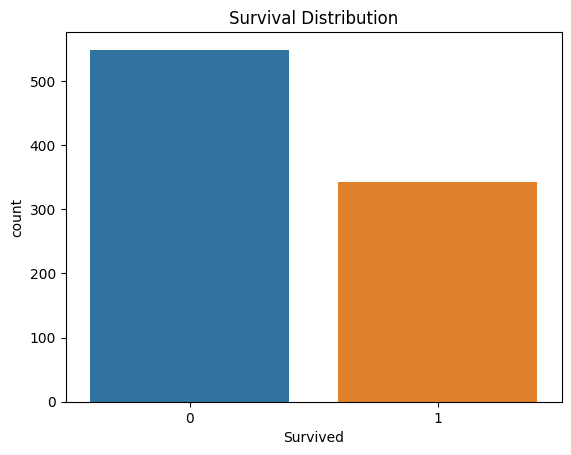

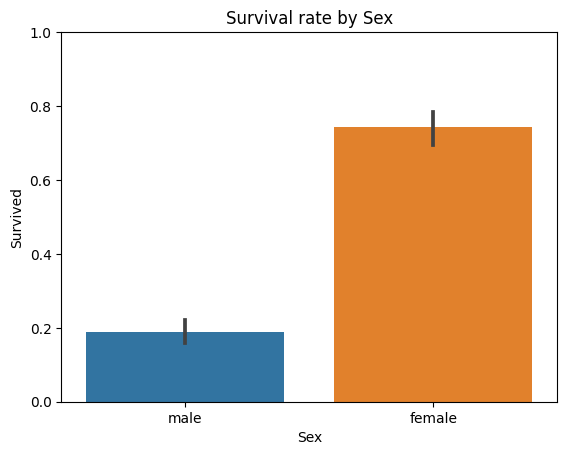

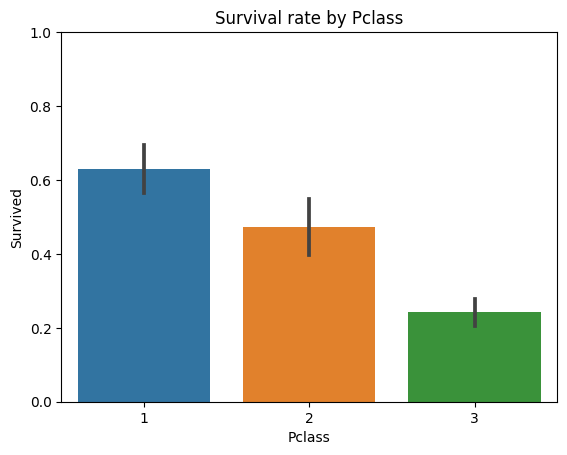

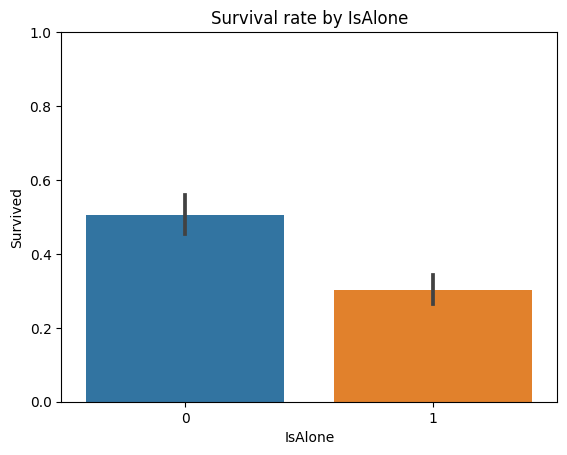

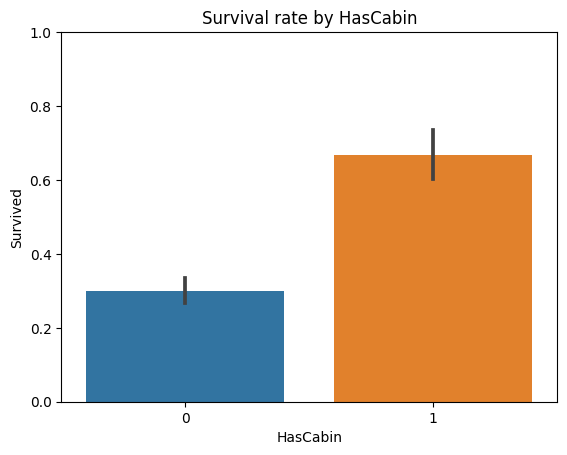

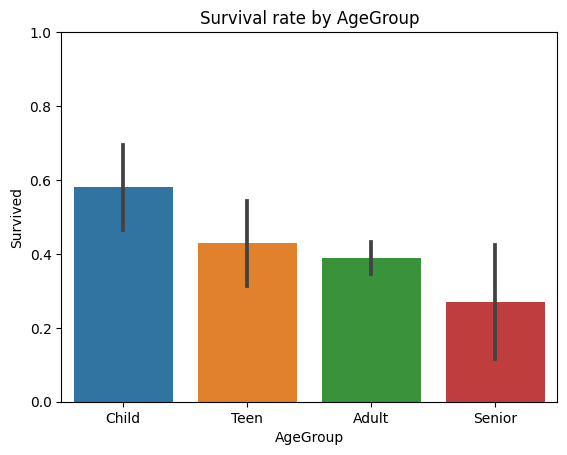

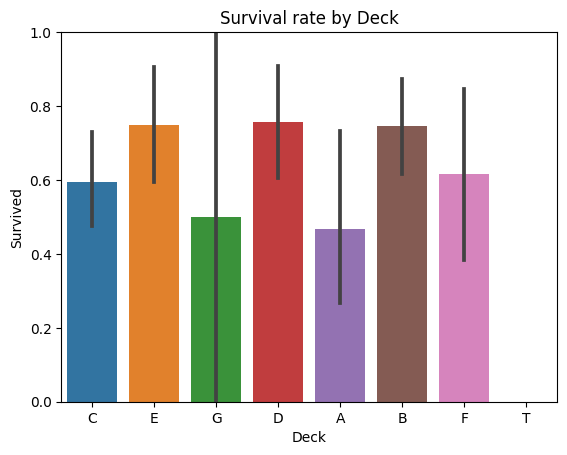

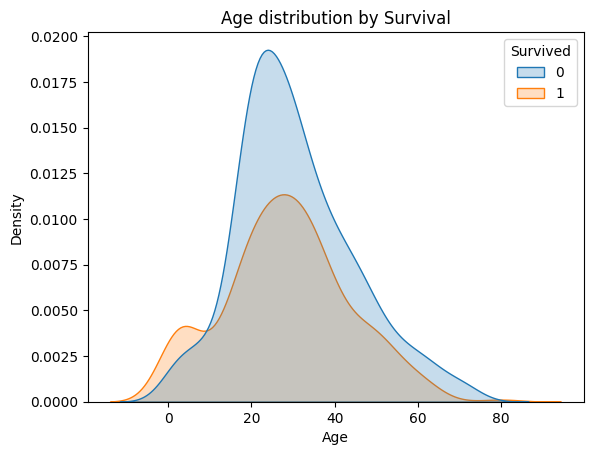

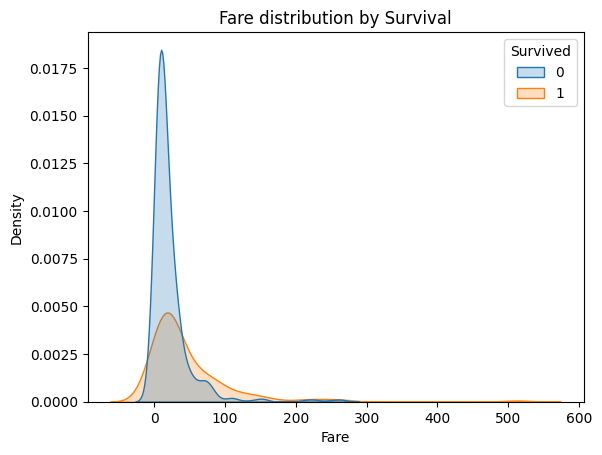

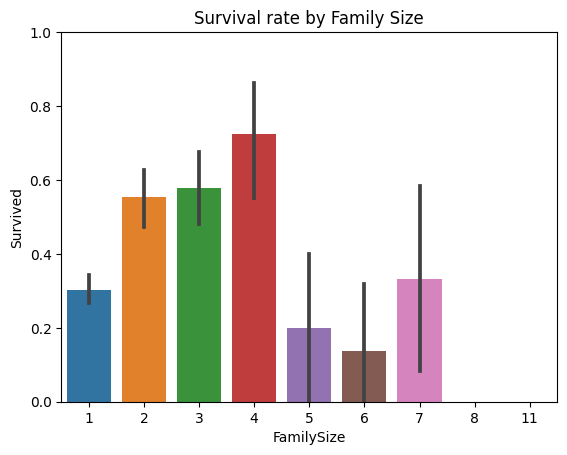

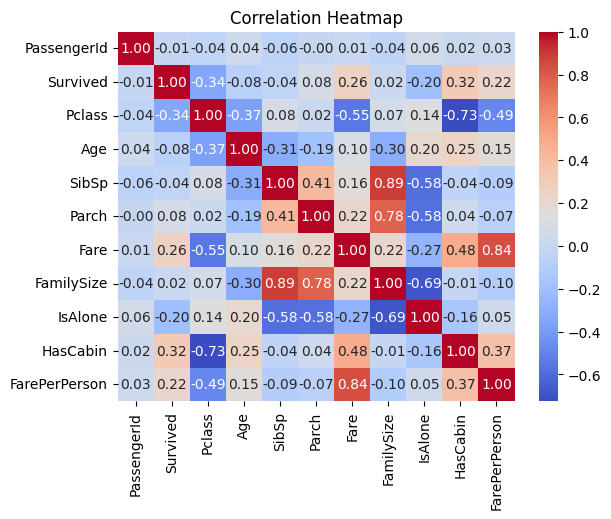

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

def apply_feature_engineering(data):
    """Add engineered features to dataset"""
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
    data['HasCabin'] = data['Cabin'].notnull().astype(int)
    data['FarePerPerson'] = data['Fare'] / data['FamilySize'].replace(0,1)
    data['Deck'] = data['Cabin'].str[0]
    
    # Age groups
    age_groups = [0, 13, 19, 60, 120]
    labels = ['Child', 'Teen', 'Adult', 'Senior']
    data['AgeGroup'] = pd.cut(data['Age'], bins = age_groups, labels = labels, right = False)
    return data

def plot_survival_distribution(data):
    sns.countplot(x = 'Survived', data = data)
    plt.title("Survival Distribution")
    plt.show()

def plot_categorical_survival(data, features):
    for feature in features:
        sns.barplot(x = feature, y = 'Survived', data = data)
        plt.title(f"Survival rate by {feature}")
        plt.ylim(0,1)
        plt.show()

def plot_age_distribution(data):
    sns.kdeplot(data = data, x = 'Age', hue = 'Survived', fill = True)
    plt.title("Age distribution by Survival")
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.show()

def plot_fare_distribution(data):
    sns.kdeplot(data = data, x = 'Fare', hue = 'Survived', fill = True)
    plt.title("Fare distribution by Survival")
    plt.xlabel("Fare")
    plt.ylabel("Density")
    plt.show()

def plot_family_size_vs_survival(data):
    sns.barplot(x = 'FamilySize', y = 'Survived', data = data)
    plt.title("Survival rate by Family Size")
    plt.ylim(0,1)
    plt.show()

def plot_correlation_heatmap(data):
    numeric_cols = data.select_dtypes(include = ['float64','int64']).columns
    sns.heatmap(data[numeric_cols].corr(), annot = True, fmt = ".2f", cmap = 'coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

def run(data):
    """Run all plots"""
    plot_survival_distribution(data)
    cat_features = ['Sex','Pclass', 'IsAlone', 'HasCabin', 'AgeGroup', 'Deck']
    plot_categorical_survival(data, cat_features)
    plot_age_distribution(data)
    plot_fare_distribution(data)
    plot_family_size_vs_survival(data)
    plot_correlation_heatmap(data)

if __name__ == "__main__":
    warnings.filterwarnings("ignore", category = FutureWarning)
    train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
    train_data = apply_feature_engineering(train_data)
    run(train_data)